In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import datetime
import time
import requests
import json
import dateutil.parser
import unicodedata
from dotenv import load_dotenv
from pytwitter import Api

In [2]:
# Load  ENV
load_dotenv()

# Set Alpaca API key and secret
# YOUR CODE HERE

twitter_api_key = os.getenv('twitter_api_key')
twitter_api_secret_key = os.getenv('twitter_api_secret_key')
bearer_token = Api(os.getenv('bearer_token'))

In [3]:
print(type(twitter_api_key))
print(type(twitter_api_secret_key))
print(type(bearer_token))

<class 'str'>
<class 'str'>
<class 'pytwitter.api.Api'>


In [4]:
from datetime import datetime

In [5]:
def convert_id_to_date(idd):
    shifted = int(idd) >> 22
    timestamp=shifted+1288834974657
    time_created = datetime.fromtimestamp(timestamp/1000).strftime('%Y-%m-%d %H:%M:%S')
    return time_created

In [6]:
tweet_response_bitcoin = bearer_token.search_tweets(query='bitcoin', max_results=100)

In [7]:
bitcoin_tweet_data = tweet_response_bitcoin.data

In [15]:
for tweet in bitcoin_tweet_data:
    print(tweet.text)
    print(convert_id_to_date(tweet.id))

@whale_alert Our analytical team has done a detailed analysis regarding #BTC, and its Fear and Greed Index is 52 - NEUTRAL at the moment with price of 41198.699658398579 usd, so what do you think about the current #Bitcoin state?
2022-04-14 19:58:09
Today #Bitcoin trades.

#btc #bitcoin #BTCUSDT #BitcoinButton https://t.co/9VyLSXG2k8
2022-04-14 19:58:09
@Degenomics2000 Hottest Alt of 2022 $BUST @BabyUST gonna be the next moonshot the #cryptocurrency World.  Time to Join  https://t.co/1K1pPQ622o 🔥🔥🔥🔥🚀🚀🚀🚀💯💯💯 #BabyUST #Bitcoin #ETH #BabyDoge https://t.co/w68TCI1TxS
2022-04-14 19:58:09
RT @nypost: Bitcoin fans are psychopaths who don't care about anyone, study shows https://t.co/9WZQkzoIPX https://t.co/YTGcULRCef
2022-04-14 19:58:09
This price action shows us that we have been in a 4-year multiyear bearmarket since Chinese New Bear-Market Year last Feb2021-2025. #Bitcoin #Bitxoin #Bitcoim has just formed a double top, is done with its dead cat bounce from 29k,and will crash to sub-1k aroun

In [24]:
bitcoin_df = pd.DataFrame(bitcoin_tweet_data)
bitcoin_df['id']=bitcoin_df['id'].apply(lambda x: convert_id_to_date(x))
bitcoin_df

,id,text,attachments,author_id,context_annotations,conversation_id,created_at,entities,geo,in_reply_to_user_id,...,non_public_metrics,organic_metrics,possibly_sensitive,promoted_metrics,public_metrics,referenced_tweets,reply_settings,source,withheld,matching_rules
0,2022-04-14 19:58:09,@whale_alert Our analytical team has done a de...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,2022-04-14 19:58:09,Today #Bitcoin trades.\n\n#btc #bitcoin #BTCUS...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,2022-04-14 19:58:09,@Degenomics2000 Hottest Alt of 2022 $BUST @Bab...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,2022-04-14 19:58:09,RT @nypost: Bitcoin fans are psychopaths who d...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,2022-04-14 19:58:08,This price action shows us that we have been i...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-04-14 19:57:43,@IshaaqZiyan @CryptoObi1 @rehan_benuka ලැබුවාව...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
96,2022-04-14 19:57:43,@24KCrypto this would be the kind of correctio...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
97,2022-04-14 19:57:43,RT @web3_shop: WEB3 NFT SHOP AIRDROP🎁\n\nAirdr...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
98,2022-04-14 19:57:42,RT @AirdropStario: 💧 GamerHub Airdrop 💧\n\n🏆 T...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [27]:
bitcoin_df_text = bitcoin_df. drop(labels=['attachments','author_id','context_annotations','conversation_id','created_at','entities','geo','in_reply_to_user_id','non_public_metrics','organic_metrics','possibly_sensitive',
                                   'promoted_metrics', 'public_metrics', 'referenced_tweets', 'reply_settings', 'source', 'withheld', 'matching_rules','lang'],
                                   axis=1)
bitcoin_df_text

,id,text
0,2022-04-14 19:58:09,@whale_alert Our analytical team has done a de...
1,2022-04-14 19:58:09,Today #Bitcoin trades.\n\n#btc #bitcoin #BTCUS...
2,2022-04-14 19:58:09,@Degenomics2000 Hottest Alt of 2022 $BUST @Bab...
3,2022-04-14 19:58:09,RT @nypost: Bitcoin fans are psychopaths who d...
4,2022-04-14 19:58:08,This price action shows us that we have been i...
...,...,...
95,2022-04-14 19:57:43,@IshaaqZiyan @CryptoObi1 @rehan_benuka ලැබුවාව...
96,2022-04-14 19:57:43,@24KCrypto this would be the kind of correctio...
97,2022-04-14 19:57:43,RT @web3_shop: WEB3 NFT SHOP AIRDROP🎁\n\nAirdr...
98,2022-04-14 19:57:42,RT @AirdropStario: 💧 GamerHub Airdrop 💧\n\n🏆 T...


In [28]:
""" DATA CLEANING AND ANALYSIS IMPORTS """

# Initial imports
import nltk
import pandas as pd
from path import Path
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

In [29]:
# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\antho\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [30]:
# Clean Tweet Data for Sentiment Analysis

# Defining set containing all stopwords in English.

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

# Cleaning and removing the above stop words list from the tweet text

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
bitcoin_df_text['text'] = bitcoin_df_text['text'].apply(lambda text: cleaning_stopwords(text))

# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
bitcoin_df_text['text']= bitcoin_df_text['text'].apply(lambda x: cleaning_punctuations(x))

# Cleaning and removing repeating characters

def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
bitcoin_df_text['text'] = bitcoin_df_text['text'].apply(lambda x: cleaning_repeating_char(x))

# Cleaning and removing URL’s
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
bitcoin_df_text['text'] = bitcoin_df_text['text'].apply(lambda x: cleaning_URLs(x))


# Removing Emojis from the dataframe: Link Below
""" https://sahil-fruitwala.medium.com/data-cleaning-101-b3d29223f256 """

bitcoin_df_text = bitcoin_df_text.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
bitcoin_df_text.head(20)

,id,text
0,2022-04-14 19:58:09,whalealert Our analytical team done detailed a...
1,2022-04-14 19:58:09,Today Bitcoin trades btc bitcoin BTCUSDT Bitco...
2,2022-04-14 19:58:09,Degenomics2000 Hottest Alt 2022 BUST BabyUST g...
3,2022-04-14 19:58:09,RT nypost Bitcoin fans psychopaths dont care a...
4,2022-04-14 19:58:08,This price action shows us 4year multiyear bea...
5,2022-04-14 19:58:08,CeekTurkey Meta Ceek ceek Meta Metaverse Nft B...
6,2022-04-14 19:58:07,RT Judesvill CryptoBebsh ArtZentsik You earn10...
7,2022-04-14 19:58:06,RT airdropinspect New airdrop BlackSquadClassi...
8,2022-04-14 19:58:06,RT BitcoinMoon Easter got better Chance pick...
9,2022-04-14 19:58:06,RT binance Milestone Giveaway Keep eyes Bitc...


In [31]:
#  Sentiment Analysis

def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

# Sentiment scores dictionaries
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in bitcoin_df_text.iterrows():
    try:
        
        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
text_sentiment_df = pd.DataFrame(text_sent)
bitcoin_df_text = bitcoin_df_text.join(text_sentiment_df)

In [32]:
bitcoin_df_text.head(50)

,id,text,text_compound,text_pos,text_neu,text_neg,text_sent
0,2022-04-14 19:58:09,whalealert Our analytical team done detailed a...,-0.7096,0.000,0.772,0.228,-1
1,2022-04-14 19:58:09,Today Bitcoin trades btc bitcoin BTCUSDT Bitco...,0.0000,0.000,1.000,0.000,0
2,2022-04-14 19:58:09,Degenomics2000 Hottest Alt 2022 BUST BabyUST g...,0.2960,0.109,0.891,0.000,1
3,2022-04-14 19:58:09,RT nypost Bitcoin fans psychopaths dont care a...,-0.3875,0.000,0.807,0.193,-1
4,2022-04-14 19:58:08,This price action shows us 4year multiyear bea...,-0.7351,0.048,0.767,0.185,-1
5,2022-04-14 19:58:08,CeekTurkey Meta Ceek ceek Meta Metaverse Nft B...,0.0000,0.000,1.000,0.000,0
6,2022-04-14 19:58:07,RT Judesvill CryptoBebsh ArtZentsik You earn10...,0.0000,0.000,1.000,0.000,0
7,2022-04-14 19:58:06,RT airdropinspect New airdrop BlackSquadClassi...,0.5719,0.198,0.802,0.000,1
8,2022-04-14 19:58:06,RT BitcoinMoon Easter got better Chance pick...,0.8271,0.492,0.508,0.000,1
9,2022-04-14 19:58:06,RT binance Milestone Giveaway Keep eyes Bitc...,0.3400,0.156,0.844,0.000,1


In [42]:
bitcoin_df_text.to_csv("Results\generalpop_bitcoin_sentiment_analysis_mostrecent2022.csv")

In [33]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!

# mystopwords = ['said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also', 'and', 'a']

# Create a list of stopwords
sw = stopwords.words('english')

# Expand the default stopwords list if necessary
sw.append("u")
sw.append("it")
sw.append("!")
sw.append("(")
sw.append(")")
sw.append("/")
sw.append("/")
sw.append("-")


# Expand the default stopwords list if necessary
# YOUR CODE HERE!

stopwords_expanded = ()

In [34]:
def tokenizer(text):
    
    """Tokenizes text."""
    
    # Create a tokenized list of the words
    words = word_tokenize(text)
                          
    # Remove the punctuation from text 
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Lemmatize words into root word
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
             
    # Remove the stop words 
    output = [word for word in words if not word in sw]
    
    return output

In [35]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

bitcoin_df_text['token_text'] = bitcoin_df_text.text.apply(tokenizer)
bitcoin_df_text

,id,text,text_compound,text_pos,text_neu,text_neg,text_sent,token_text
0,2022-04-14 19:58:09,whalealert Our analytical team done detailed a...,-0.7096,0.000,0.772,0.228,-1,"[whalealert, Our, analytical, team, done, deta..."
1,2022-04-14 19:58:09,Today Bitcoin trades btc bitcoin BTCUSDT Bitco...,0.0000,0.000,1.000,0.000,0,"[Today, Bitcoin, trade, btc, bitcoin, BTCUSDT,..."
2,2022-04-14 19:58:09,Degenomics2000 Hottest Alt 2022 BUST BabyUST g...,0.2960,0.109,0.891,0.000,1,"[Degenomics2000, Hottest, Alt, 2022, BUST, Bab..."
3,2022-04-14 19:58:09,RT nypost Bitcoin fans psychopaths dont care a...,-0.3875,0.000,0.807,0.193,-1,"[RT, nypost, Bitcoin, fan, psychopath, dont, c..."
4,2022-04-14 19:58:08,This price action shows us 4year multiyear bea...,-0.7351,0.048,0.767,0.185,-1,"[This, price, action, show, 4year, multiyear, ..."
...,...,...,...,...,...,...,...,...
95,2022-04-14 19:57:43,IshaaqZiyan CryptoOb1 rehanbenuka Purchas...,0.0000,0.000,1.000,0.000,0,"[IshaaqZiyan, CryptoOb1, rehanbenuka, Purchasi..."
96,2022-04-14 19:57:43,24KCrypto would kind correction would follow w...,-0.3400,0.109,0.673,0.218,-1,"[24KCrypto, would, kind, correction, would, fo..."
97,2022-04-14 19:57:43,RT web3shop WEB3 NFT SHOP AIRDROP Airdrop Rewa...,0.8020,0.298,0.702,0.000,1,"[RT, web3shop, WEB3, NFT, SHOP, AIRDROP, Airdr..."
98,2022-04-14 19:57:42,RT AirdropStario GamerHub Airdrop Task Up ...,0.0000,0.000,1.000,0.000,0,"[RT, AirdropStario, GamerHub, Airdrop, Task, U..."


In [36]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
bitcoin_df_text['text']= bitcoin_df_text['text'].apply(lambda x: stemming_on_text(x))
bitcoin_df_text['text'].head()

0    whalealert Our analytical team done detailed a...
1    Today Bitcoin trades btc bitcoin BTCUSDT Bitco...
2    Degenomics2000 Hottest Alt 2022 BUST BabyUST g...
3    RT nypost Bitcoin fans psychopaths dont care a...
4    This price action shows us 4year multiyear bea...
Name: text, dtype: object

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

# Generate the Bitcoin word cloud
# YOUR CODE HERE
token_text_df_bitcoin = bitcoin_df_text['token_text']
token_text_df_bitcoin

0     [whalealert, Our, analytical, team, done, deta...
1     [Today, Bitcoin, trade, btc, bitcoin, BTCUSDT,...
2     [Degenomics2000, Hottest, Alt, 2022, BUST, Bab...
3     [RT, nypost, Bitcoin, fan, psychopath, dont, c...
4     [This, price, action, show, 4year, multiyear, ...
                            ...                        
95    [IshaaqZiyan, CryptoOb1, rehanbenuka, Purchasi...
96    [24KCrypto, would, kind, correction, would, fo...
97    [RT, web3shop, WEB3, NFT, SHOP, AIRDROP, Airdr...
98    [RT, AirdropStario, GamerHub, Airdrop, Task, U...
99    [RT, theRealKiyosaki, BUFFET, buy, SELL, He, s...
Name: token_text, Length: 100, dtype: object

In [38]:
bitcoin_token_text = ' '.join(str(e) for e in token_text_df_bitcoin)
bitcoin_token_text

"['whalealert', 'Our', 'analytical', 'team', 'done', 'detailed', 'analysis', 'regarding', 'BTC', 'Fear', 'Greed', 'Index', '52', 'NEUTRAL', 'moment', 'price', '198699658398579', 'usd', 'think', 'current', 'Bitcoin', 'state'] ['Today', 'Bitcoin', 'trade', 'btc', 'bitcoin', 'BTCUSDT', 'BitcoinButton', 'httpstco9VyLSXG2k8'] ['Degenomics2000', 'Hottest', 'Alt', '2022', 'BUST', 'BabyUST', 'gon', 'na', 'next', 'moonshot', 'cryptocurrency', 'World', 'Time', 'Join', 'httpstc11pPQ622o', 'BabyUST', 'Bitcoin', 'ETH', 'BabyDoge', 'httpstcow68TC1TxS'] ['RT', 'nypost', 'Bitcoin', 'fan', 'psychopath', 'dont', 'care', 'anyone', 'study', 'show', 'httpstco9WZQkzoIPX', 'httpstcoYTGcULRCef'] ['This', 'price', 'action', 'show', '4year', 'multiyear', 'bearmarket', 'since', 'Chinese', 'New', 'BearMarket', 'Year', 'last', 'Feb2012025', 'Bitcoin', 'Bitxoin', 'Bitcoim', 'formed', 'double', 'top', 'done', 'dead', 'cat', 'bounce', '29kand', 'crash', 'su1k', 'around', '700770', 'BTC', 'httpstcoL6yfodP2mH'] ['CeekT

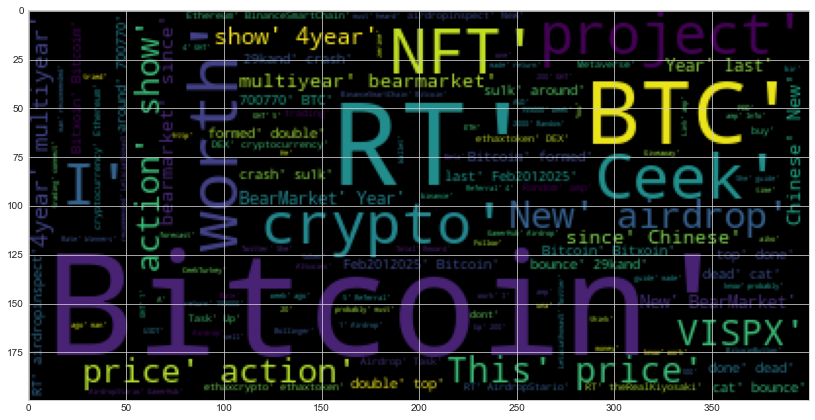

In [39]:
wc = WordCloud().generate(bitcoin_token_text)
plt.figure( figsize=(14,8) )
plt.imshow(wc)